In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import glob
import seaborn as sns

In [24]:
#Creating the Training dataframe
path = r'/home/harindu/Assignment_II/accel_data' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

activityDF = pd.concat(li, axis=0, ignore_index=True)

In [3]:
#Creating the Testing dataframe
path = r'/home/harindu/Assignment_II/accel_data_test' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

activityDF_Test = pd.concat(li, axis=0, ignore_index=True)

In [25]:
activityDF.columns = ['index', 'xAccel', 'yAccel', 'zAccel', 'activity']

In [26]:
activityDF = activityDF.drop(['index'], axis=1)

In [27]:
activityDF = activityDF.drop(activityDF[activityDF.activity == 0].index)

In [28]:
activityDF['activity'].value_counts()

1    469437
7    436951
4    268320
3    150927
5     37338
2     35703
6     29320
Name: activity, dtype: int64

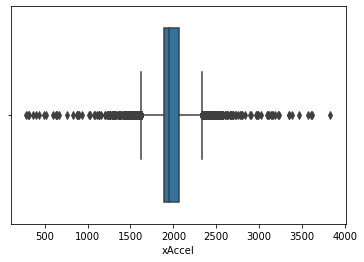

In [29]:
sns.boxplot(x=activityDF['xAccel'])

In [30]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(activityDF))
print(z)

[[4.2213139  1.62177529 1.90657531 1.16056997]
 [2.70009175 3.03046251 0.67014542 1.16056997]
 [3.21638533 4.16332285 0.97453962 1.16056997]
 ...
 [1.34728111 0.6465303  0.11137158 1.28852044]
 [1.40259828 0.5972755  0.19302261 1.28852044]
 [1.39337875 0.5972755  0.23968034 1.28852044]]


In [33]:
Q1 = activityDF.quantile(0.25)
Q3 = activityDF.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

xAccel      178.0
yAccel       58.0
zAccel       89.0
activity      6.0
dtype: float64


In [34]:
activityDF_out = activityDF[~((activityDF < (Q1 - 1.5 * IQR)) |(activityDF > (Q3 + 1.5 * IQR))).any(axis=1)]
activityDF_out.shape

(1032707, 4)

In [35]:
activityDF_out

,xAccel,yAccel,zAccel,activity
92,1630,2359,1947,1
94,1706,2277,1986,1
98,1735,2343,2002,1
102,1641,2254,1993,1
109,1638,2284,1966,1
...,...,...,...,...
1431436,2100,2309,1984,7
1431437,2098,2305,1982,7
1431438,2106,2314,1980,7
1431439,2112,2319,1973,7


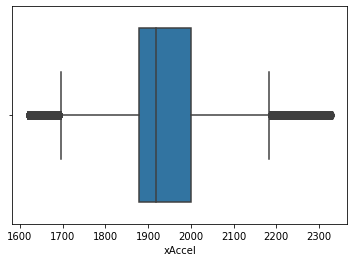

In [43]:
sns.boxplot(x=activityDF_out['xAccel'])

In [50]:
activityDF_out = activityDF_out.drop(activityDF_out[activityDF_out.xAccel > 2063].index)
activityDF_out = activityDF_out.drop(activityDF_out[activityDF_out.xAccel < 1885].index)

activityDF_out = activityDF_out.drop(activityDF_out[activityDF_out.yAccel > 2395].index)
activityDF_out = activityDF_out.drop(activityDF_out[activityDF_out.yAccel < 2337].index)

activityDF_out = activityDF_out.drop(activityDF_out[activityDF_out.zAccel > 2041].index)
activityDF_out = activityDF_out.drop(activityDF_out[activityDF_out.zAccel < 1952].index)

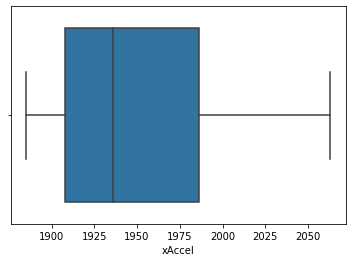

In [49]:
sns.boxplot(x=activityDF_out['xAccel'])

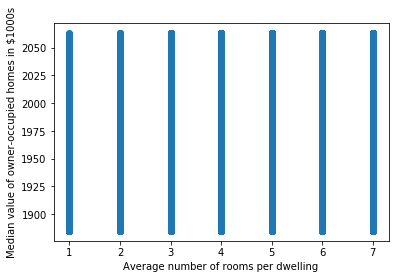

In [53]:
plt.scatter( activityDF_out['activity'], activityDF_out['xAccel'])
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

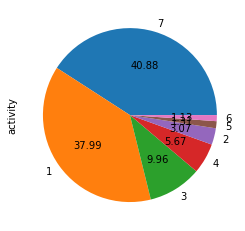

In [54]:
#Gender distribution in the dataset

activityDF_out['activity'].value_counts().plot(kind='pie',autopct='%.2f')

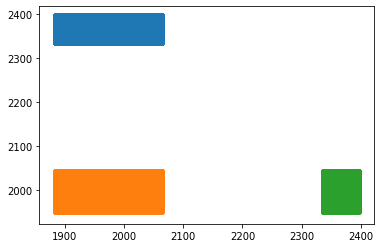

In [55]:
plt.scatter(activityDF_out['xAccel'],activityDF_out['yAccel'])
plt.scatter(activityDF_out['xAccel'],activityDF_out['zAccel'])
plt.scatter(activityDF_out['yAccel'],activityDF_out['zAccel'])
plt.show()

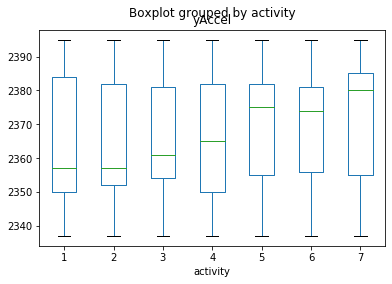

In [58]:
activityDF_out.boxplot(by ='activity', column =['yAccel'], grid = False) 

AttributeError: 'Annotation' object has no property 'height'

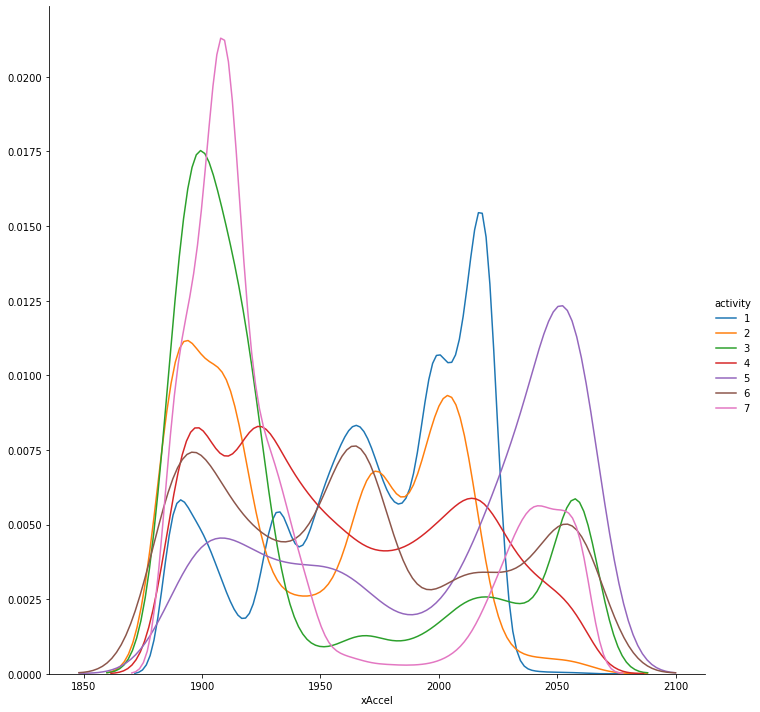

In [70]:
facetgrid = sns.FacetGrid(data = activityDF_out, hue = "activity", height = 10)
facetgrid.map(sns.distplot, "xAccel", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(1, 100),
            arrowprops=dict(facecolor='orange', width = 15, headlength = 15), height = 15, color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', 
            arrowprops=dict(facecolor='orange', width = 15, headlength = 13), height = 15, color = "#232b2b")
plt.show()


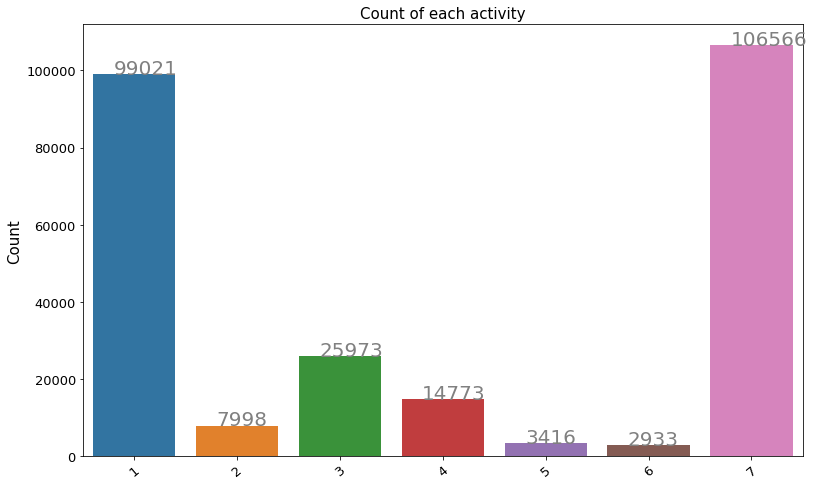

In [62]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity", data = activityDF_out)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

In [63]:
activityDFMod = activityDF_out.copy()
activityDFMod['averageXYZ'] = activityDFMod[['xAccel','yAccel','zAccel']].mean(axis=1)
activityDFMod

,xAccel,yAccel,zAccel,activity,averageXYZ
165,1985,2367,1966,1,2106.000000
195,2033,2394,1986,1,2137.666667
237,2062,2369,1995,1,2142.000000
291,1954,2381,2034,1,2123.000000
296,2011,2359,2028,1,2132.666667
...,...,...,...,...,...
1430881,2020,2343,1993,7,2118.666667
1430891,2063,2338,1983,7,2128.000000
1431065,2034,2341,1989,7,2121.333333
1431066,2059,2354,1976,7,2129.666667


AttributeError: 'Annotation' object has no property 'height'

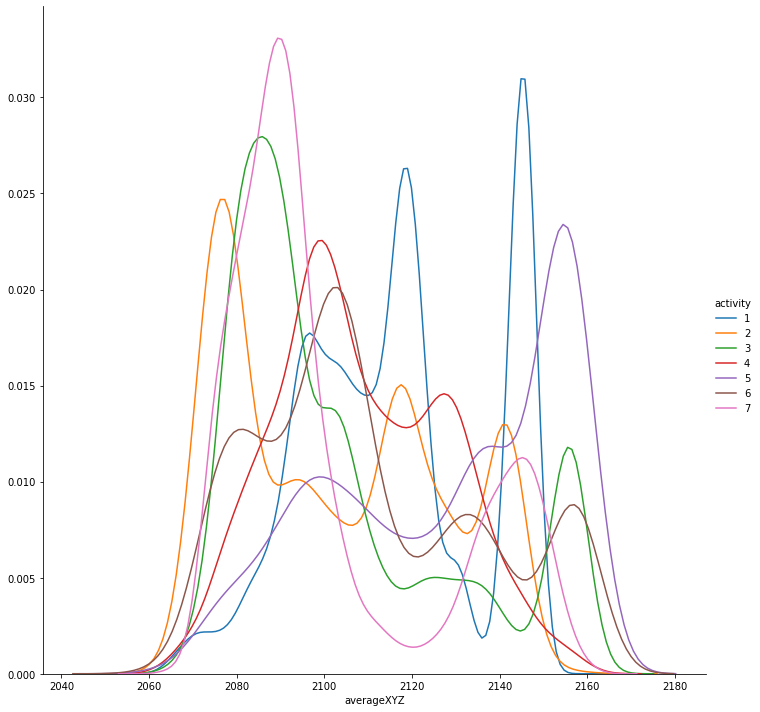

In [64]:
facetgrid = sns.FacetGrid(data = activityDFMod, hue = "activity", height = 10)
facetgrid.map(sns.distplot, "averageXYZ", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(1, 100),
            arrowprops=dict(facecolor='orange', width = 15, headlength = 15), height = 15, color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', 
            arrowprops=dict(facecolor='orange', width = 15, headlength = 13), height = 15, color = "#232b2b")
plt.show()


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
activityDF[['xAccel', 'yAccel', 'zAccel']] = scaler.fit_transform(activityDF[['xAccel', 'yAccel', 'zAccel']])

In [21]:
activityDF

,xAccel,yAccel,zAccel,activity
0,1502,2215,2153,1
1,1667,2072,2047,1
2,1611,1957,1906,1
3,1601,1939,1831,1
4,1643,1965,1879,1
...,...,...,...,...
1431436,2100,2309,1984,7
1431437,2098,2305,1982,7
1431438,2106,2314,1980,7
1431439,2112,2319,1973,7


In [22]:
from sklearn.preprocessing import RobustScaler
robust = RobustScaler()
activityDF[['xAccel', 'yAccel', 'zAccel']] = robust.fit_transform(activityDF[['xAccel', 'yAccel', 'zAccel']])


In [23]:
activityDF

,xAccel,yAccel,zAccel,activity
0,-2.522472,-2.551724,1.707865,1
1,-1.595506,-5.017241,0.516854,1
2,-1.910112,-7.000000,-1.067416,1
3,-1.966292,-7.310345,-1.910112,1
4,-1.730337,-6.862069,-1.370787,1
...,...,...,...,...
1431436,0.837079,-0.931034,-0.191011,7
1431437,0.825843,-1.000000,-0.213483,7
1431438,0.870787,-0.844828,-0.235955,7
1431439,0.904494,-0.758621,-0.314607,7
